Importing Libraries:

In [74]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

Reading and Checking Data of Stock Dataset:

In [75]:
data = pd.read_csv("GC=F.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-17,1715.699951,1725.000000,1684.900024,1689.199951,1689.199951,223.0
1,2020-04-20,1686.000000,1701.599976,1680.000000,1701.599976,1701.599976,106.0
2,2020-04-21,1697.000000,1707.099976,1659.900024,1678.199951,1678.199951,666.0
3,2020-04-22,1696.000000,1728.699951,1684.800049,1728.699951,1728.699951,453.0
4,2020-04-23,1734.000000,1745.099976,1733.300049,1733.300049,1733.300049,482.0


In [76]:
data.shape

(252, 7)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


In [78]:
data.nunique()

Date         252
Open         242
High         238
Low          239
Close        240
Adj Close    240
Volume       220
dtype: int64

In [79]:
list_columns = data.columns
list_columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [80]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,1827.046402,1837.653204,1815.976799,1826.981599,1826.981599,4485.168000
std,89.553277,90.481396,88.437663,89.258963,89.258963,25334.406287
min,1679.099976,1699.400024,1659.900024,1676.199951,1676.199951,4.000000
25%,1738.275025,1745.600006,1726.624970,1734.674988,1734.674988,136.500000
50%,1834.800049,1844.100036,1826.750000,1834.950012,1834.950012,329.500000
75%,1896.625000,1908.000000,1884.450012,1899.799957,1899.799957,750.500000
max,2045.500000,2063.000000,2040.000000,2051.500000,2051.500000,209835.000000


Heatmap using Statistical Information of the dataframe:

Text(0.5, 1.0, 'Heatmap')

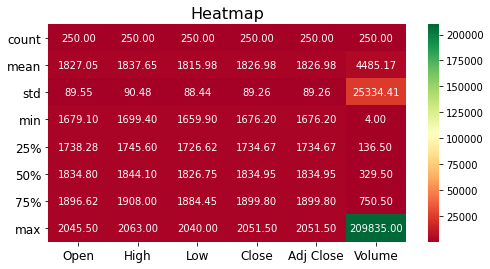

In [81]:
plt.figure(figsize=(8,4))
sns.heatmap(data.describe(), annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title("Heatmap", fontsize = 16)

In [82]:
data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [83]:
data.dropna(inplace=True)

In [84]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [85]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [86]:
data['Date'] = pd.to_datetime(data['Date'] ,format='%Y-%m-%d')
data.index = data['Date']

History of trading open price:

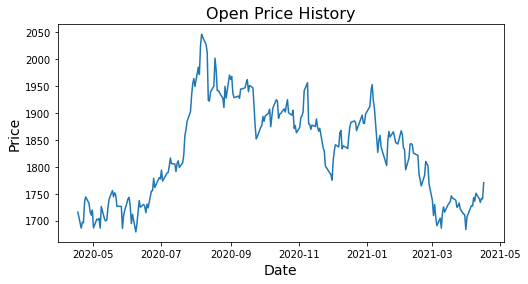

In [87]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Open'])
plt.title("Open Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of trading close price:

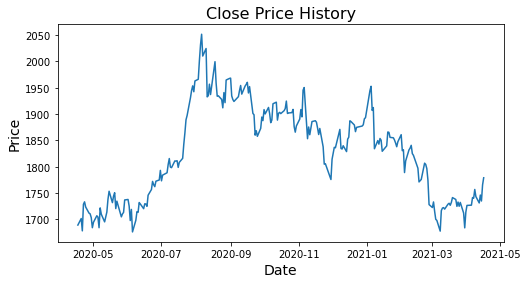

In [88]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Close'])
plt.title("Close Price History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()


History of stock price growth:

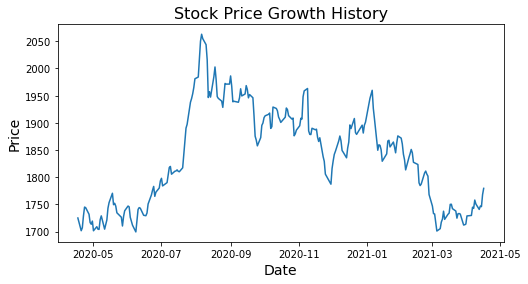

In [89]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['High'])
plt.title("Stock Price Growth History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of low stock price:

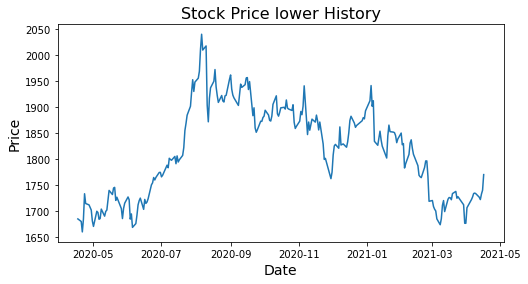

In [90]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Low'])
plt.title("Stock Price lower History", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of adjusted close stock price:

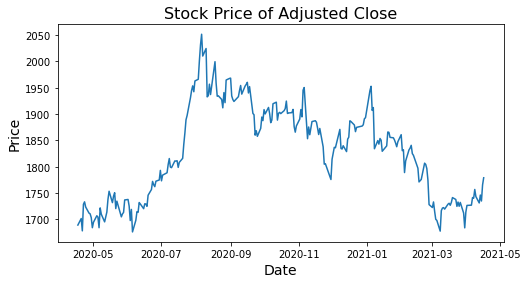

In [91]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Adj Close'])
plt.title("Stock Price of Adjusted Close", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

History of stock price volume:

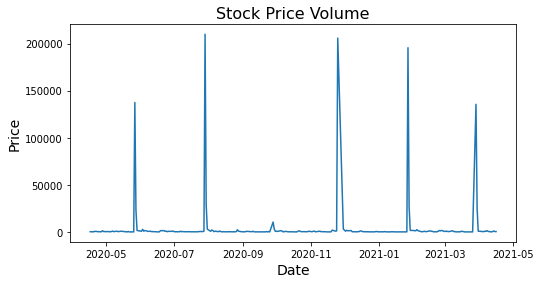

In [92]:
plt.figure(figsize=(8,4))
plt.plot(data['Date'], data['Volume'])
plt.title("Stock Price Volume", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Stock market volume price Prediction:

Assigning values for x and y:

In [93]:
x = data.iloc[:, 1:7].values
y = data.iloc[:, -1].values


Splitting the dataset using train_test_split:

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

Standard Scale transform:

In [95]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Random Forest Regression model training on the Training set:

In [96]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

print("The Random Forest Regression model trained")

The Random Forest Regression model trained


In [97]:
y_pred = regressor.predict(x_test)
y_pred

array([7.480000e+01, 5.956000e+02, 3.012500e+03, 1.697700e+03,
       1.054300e+03, 1.509200e+03, 1.200600e+03, 2.068000e+02,
       2.470000e+01, 1.256191e+05, 4.942000e+02, 5.270000e+01,
       5.140000e+01, 1.521000e+02, 7.303000e+02, 3.012500e+03,
       1.852000e+02, 7.280000e+02, 1.853600e+03, 7.520000e+01,
       2.264900e+03, 1.272600e+03, 2.195340e+04, 3.684000e+02,
       1.576000e+02, 1.768000e+02, 3.703000e+02, 7.448000e+02,
       1.256191e+05, 7.186000e+02, 5.109000e+02, 1.866400e+03,
       5.000000e+00, 7.480000e+01, 2.579000e+02, 2.393000e+02,
       1.175500e+03, 2.214000e+02, 1.697000e+02, 2.622000e+02,
       1.437400e+03, 7.480000e+01, 3.570000e+01, 4.618000e+02,
       9.540000e+01, 1.733000e+02, 1.273000e+02, 1.273800e+03,
       9.470000e+01, 1.124000e+02, 1.256191e+05, 1.174500e+03,
       3.298000e+02, 2.194200e+03, 1.641000e+02, 7.248000e+02,
       1.338000e+02, 4.271000e+02, 1.390000e+01, 3.283000e+02,
       8.639000e+02, 6.792000e+02, 1.239400e+03, 7.2180

Visualizing the Train Result:

In [98]:
df = pd.DataFrame()
df

""


In [99]:
Pred_x_train = regressor.predict(x_train)

df['predict_train'] = Pred_x_train
df['predict_train']

0      330.4
1      890.0
2      335.2
3      184.8
4      477.9
       ...  
161    133.0
162     25.4
163    516.5
164    969.8
165    232.6
Name: predict_train, Length: 166, dtype: float64

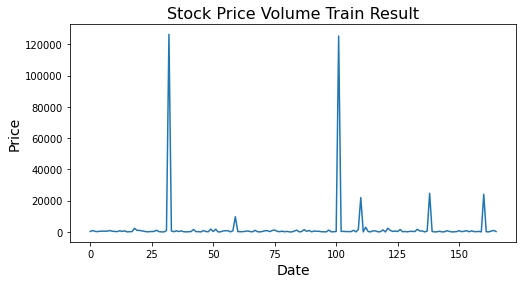

In [100]:
plt.figure(figsize=(8,4))
plt.plot(df['predict_train'])
plt.title("Stock Price Volume Train Result", fontsize = 16)
plt.xlabel("Date", fontsize = 14)
plt.ylabel("Price", fontsize = 14)
plt.show()

Visualizing the Test Result:

In [101]:
df1 = pd.DataFrame()
df1

""


In [102]:
df1['predict'] = y_pred
df1['predict']

0       74.8
1      595.6
2     3012.5
3     1697.7
4     1054.3
       ...  
79     169.1
80     186.6
81     328.5
82     216.4
83      37.9
Name: predict, Length: 84, dtype: float64

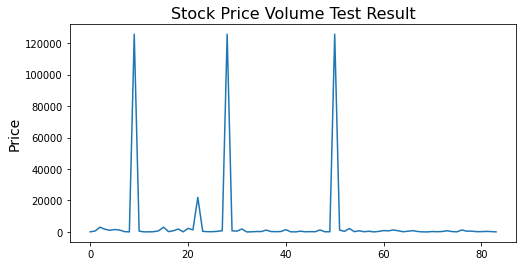

In [103]:
plt.figure(figsize=(8,4))
plt.plot(df1['predict'])
plt.title("Stock Price Volume Test Result", fontsize = 16)
plt.ylabel("Price", fontsize = 14)
plt.show()

Accuracy of model:

In [104]:
print("Accuracy score : ", np.mean(y_pred==y_test))

Accuracy score :  0.023809523809523808


Reading and Checking dataset of India News:

In [105]:
news_df = pd.read_csv('india-news-headlines.csv')
news_df.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [106]:
news_df.shape

(3424067, 3)

In [107]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [108]:
news_df.dtypes

publish_date          int64
headline_category    object
headline_text        object
dtype: object

In [109]:
news_df['headline_text']

0          Status quo will not be disturbed at Ayodhya; s...
1                        Fissures in Hurriyat over Pak visit
2                      America's unwanted heading for India?
3                         For bigwigs; it is destination Goa
4                       Extra buses to clear tourist traffic
                                 ...                        
3424062    Covid-19: Despite dip in cases; Rajasthan amon...
3424063    Covid-19: Despite dip in cases; Rajasthan amon...
3424064    Covid-19: Despite dip in cases; Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, Length: 3424067, dtype: object

Removing Duplicates:

In [110]:
news_df.drop('headline_category', axis=1, inplace=True)
news_df['publish_date'] = pd.to_datetime(news_df['publish_date'], format='%Y%m%d')
news_df.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [111]:
news_df.rename(columns={'publish_date': 'Date'}, inplace = True)

news_df = news_df.drop_duplicates()
news_df.reset_index(inplace=True, drop=True)
news_df.head()

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


Importing TextBlob:

In [112]:
from textblob import TextBlob

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

news_df['Subjectivity'] = news_df['headline_text'].apply(getSubjectivity)
news_df['Polarity'] = news_df['headline_text'].apply(getPolarity)
news_df.head()

,Date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05


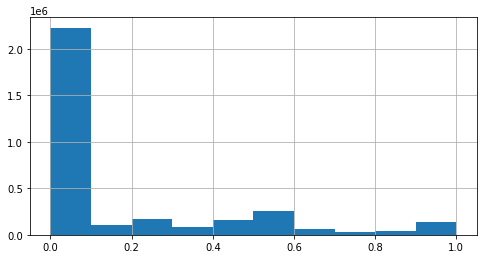

In [113]:
plt.figure(figsize = (8,4))
news_df['Subjectivity'].hist()
plt.show()

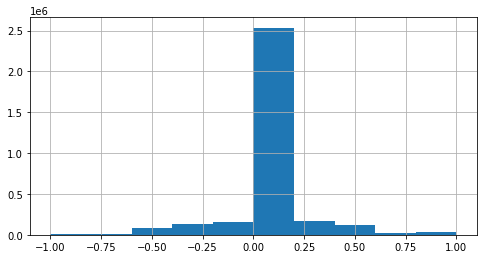

In [114]:
plt.figure(figsize = (8,4))
news_df['Polarity'].hist()
plt.show()

SentimentIntensity Analyzer:

In [115]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 5.8MB/s 


In [116]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

senti_ana = SentimentIntensityAnalyzer()

news_df['compound'] = [senti_ana.polarity_scores(i)['compound'] for i in news_df['headline_text']]
news_df['Negative'] = [senti_ana.polarity_scores(i)['neg'] for i in news_df['headline_text']]
news_df['Neutral'] = [senti_ana.polarity_scores(i)['neu'] for i in news_df['headline_text']]
news_df['Positive'] = [senti_ana.polarity_scores(i)['pos'] for i in news_df['headline_text']]

news_df.head()

,Date,headline_text,Subjectivity,Polarity,compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.00,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.00,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,0.000000,0.00,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.000000,0.00,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.05,0.3818,0.000,0.658,0.342
